# KMeans - Code 

## What you will learn in this course 🧐🧐

Now that you have a better understanding of what KMeans is all about, let's see how to implement it in code. In the course you will learn: 

* How to create a K-Means algorithm
* Select K Optimal clusters using Elbow and Silhouette method 

## Install plotly

In [1]:
!pip install plotly==4.9.0
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [2]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

## Dataset 🔥🔥

Let's use the <a href="https://scikit-learn.org/stable/datasets/index.html#iris-dataset" target="_blank">Iris dataset</a> from <a href="https://scikit-learn.org/stable/index.html" target="_blank">Scikit Learn</a>

In [3]:
# Import Iris 
from sklearn.datasets import load_iris

# Load iris as a DataFrame seperated where we only get target values
# It is common to use _ when we don't need the values return by the tuple
# Here we don't need the target variable since we will perform unsupervised learning
X, _ = load_iris(return_X_y=True, as_frame=True)

# Visualize first 5 rows
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Normalize dataset 📏📏

Before applying K-Means, let's normalize our dataset to avoid inflating our dataset since K-Means is using Euclidian Distance.

In [4]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(X)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Apply K-Means 🚀🚀

Let's now apply <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans" target="_blank">K-Means</a> on our dataset. As we already know there are 3 different types of flowers in our dataset (If you need confirmation, check out the dataset here 👉👉 <a href="https://scikit-learn.org/stable/datasets/index.html#iris-dataset" target="_blank">Iris Description</a> ). 

Therefore, we will be initializing $K=3$. We'll prove that it is the optimal number later on in the course. 


In [6]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=3 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

Our model is initialized and converged! Let's check out the coordinates of each cluster centers 

<AxesSubplot:>

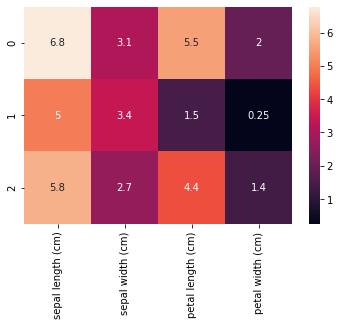

In [7]:
# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates 
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Let's get column names to facilita understanding 
labels = load_iris().feature_names

# Let's visualize on a heatmap 
## Import Seaborn and pandas 
import seaborn as sns
import pandas as pd 

# Create a heatmap 
sns.heatmap(pd.DataFrame(cluster_centers, columns=labels),  annot=True)

If you want to check out how an unknown observation will be classified. You can simply use `.predict()`

In [8]:
## Create data using numpy 
import numpy as np 
d = np.array([[5, 2, 1, 0.1]])

## Apply standard scaler 
d = sc.transform(d)

## Get cluster 
c = kmeans.predict(d)
print("d belongs to cluster: {}".format(c[0]))

d belongs to cluster: 2


## Select $K$ optimal clusters 

### Elbow method 💪

Let's actually visualize how many clusters we should have using the Elbow Method. 

In [9]:
# Let's create a loop that will collect the Within-sum-of-square (wcss) for each value K 
# Let's use .inertia_ parameter to get the within sum of square value for each value K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 599.9999999999999
WCSS for K=2 --> 222.36170496502294
WCSS for K=3 --> 139.82049635974968
WCSS for K=4 --> 114.09748520602311
WCSS for K=5 --> 90.80759161913355
WCSS for K=6 --> 80.03687480296507
WCSS for K=7 --> 71.94569816850404
WCSS for K=8 --> 62.97004489135638
WCSS for K=9 --> 54.47655881605241
WCSS for K=10 --> 47.261862542339834


In [10]:
# Let's visualize using plotly
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

As you can see, after $K=3$ or $K=4$ WCSS is not decreasing a whole lot. 

## Silhouette 👥

Let's now double check with the Silhouette method. We will use Sklearn again to get <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score" target="_blank">silhouette scores.</a>

In [11]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.5817500491982808
Silhouette score for K=3 is 0.45994823920518646
Silhouette score for K=4 is 0.386594485974282
Silhouette score for K=5 is 0.34551099599809465
Silhouette score for K=6 is 0.32674451109112396
Silhouette score for K=7 is 0.33234798580106617
Silhouette score for K=8 is 0.34258090311510425
Silhouette score for K=9 is 0.35303022646799614
Silhouette score for K=10 is 0.34846663159040425


Let's now visualize each score using Plotly.

In [12]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

Here silhouette method suggests that we should choose $K=3$ instead of 4. 

In any case, that is why you should use both methods and choose according to your business knowledge and intuition. 

## Resources 📚📚

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans" target="_blank"> KMeans </a>

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score" target="_blank">Silhouette Score</a>

* <a href="https://plotly.com/python/plotly-express/" target="_blank"> Plotly Express </a>

* <a href="https://plotly.com/python/renderers/" target="_blank">Plotly Renderers</a>